Based on season stats, this project will attempt to use logistic regression to determine if a team made the NCAA tournament. The second goal will be predicting if a team made the sweet 16 or not. This is good practice for building simple logistic regression models, evaluating the performance, and finalizing predictions on a test set. 

In [2]:
# Import all data from stats reference.
import pandas as pd

data_9_10 = pd.read_csv("2009-2010.csv")
data_10_11 = pd.read_csv("2010-2011.csv")
data_11_12 = pd.read_csv("2011-2012.csv")
data_12_13 = pd.read_csv("2012-2013.csv")
data_13_14 = pd.read_csv("2013-2014.csv")
data_14_15 = pd.read_csv("2014-2015.csv")
data_15_16 = pd.read_csv("2015-2016.csv")
data_16_17 = pd.read_csv("2016-2017.csv")
data_17_18 = pd.read_csv("2017-2018.csv")
data_18_19 = pd.read_csv("2018-2019.csv")
# 2019-2020 had no NCAA tournament due to the COVID-19 pandemic
data_20_21 = pd.read_csv("2020-2021.csv")
data_21_22 = pd.read_csv("2021-2022.csv")
data_22_23 = pd.read_csv("2022-2023.csv")
data_23_24 = pd.read_csv("2023-2024.csv")

In [3]:
# Merge all data sets together using pd.concat
dataframes = [data_9_10, data_10_11, data_11_12, data_12_13, data_13_14, data_14_15, data_15_16, data_16_17, data_17_18, data_18_19, data_20_21, data_21_22, data_22_23, data_23_24]
combined = pd.concat(dataframes, axis = 0)
combined

,Year,School,G,W,L,W-L%,SRS,SOS,Tm.,Opp.,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,2009-2010,Air Force,31,10,21,0.323,-4.90,3.13,1773,1957,...,0.394,0.529,46.8,61.6,8.4,6.2,0.504,19.0,24.2,0.233
1,2009-2010,Akron,35,24,11,0.686,2.82,-1.50,2472,2293,...,0.343,0.521,51.6,53.9,9.0,8.5,0.491,16.4,37.2,0.239
2,2009-2010,Alabama,32,17,15,0.531,10.34,6.62,2192,2073,...,0.279,0.525,50.5,54.2,11.8,10.9,0.490,16.4,35.0,0.242
3,2009-2010,Alabama A&M,27,11,16,0.407,-20.19,-13.71,1778,1881,...,0.237,0.463,46.8,48.1,12.5,12.7,0.416,18.8,33.9,0.301
4,2009-2010,Alabama State,31,16,15,0.516,-14.41,-12.02,1998,2043,...,0.356,0.499,51.3,60.0,10.8,11.1,0.462,20.0,35.6,0.287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2023-2024,Wright State,32,18,14,0.563,-0.22,-3.62,2767,2599,...,0.292,0.615,51.6,51.2,8.5,7.2,0.586,14.4,28.6,0.248
358,2023-2024,Wyoming,32,15,17,0.469,0.54,4.57,2331,2383,...,0.369,0.560,50.8,47.3,7.5,7.0,0.519,16.4,29.1,0.289
359,2023-2024,Xavier,34,16,18,0.471,12.23,11.03,2579,2538,...,0.320,0.530,51.5,59.7,9.7,8.4,0.491,14.0,31.9,0.237
360,2023-2024,Yale NCAA,33,23,10,0.697,4.63,0.41,2465,2226,...,0.349,0.553,52.8,53.9,9.2,9.6,0.528,12.4,28.9,0.196


In [4]:
# The 'School' column has a string named 'NCAA' added which denotes if that team made the NCAA tournament. This line of code creates our binary target variable.
combined['Made_Tournament'] = combined['School'].apply(lambda x: 1 if 'NCAA' in x else 0)
combined['Made_Tournament'].sum()

949

In [5]:
# View data
combined

,Year,School,G,W,L,W-L%,SRS,SOS,Tm.,Opp.,...,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Made_Tournament
0,2009-2010,Air Force,31,10,21,0.323,-4.90,3.13,1773,1957,...,0.529,46.8,61.6,8.4,6.2,0.504,19.0,24.2,0.233,0
1,2009-2010,Akron,35,24,11,0.686,2.82,-1.50,2472,2293,...,0.521,51.6,53.9,9.0,8.5,0.491,16.4,37.2,0.239,0
2,2009-2010,Alabama,32,17,15,0.531,10.34,6.62,2192,2073,...,0.525,50.5,54.2,11.8,10.9,0.490,16.4,35.0,0.242,0
3,2009-2010,Alabama A&M,27,11,16,0.407,-20.19,-13.71,1778,1881,...,0.463,46.8,48.1,12.5,12.7,0.416,18.8,33.9,0.301,0
4,2009-2010,Alabama State,31,16,15,0.516,-14.41,-12.02,1998,2043,...,0.499,51.3,60.0,10.8,11.1,0.462,20.0,35.6,0.287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2023-2024,Wright State,32,18,14,0.563,-0.22,-3.62,2767,2599,...,0.615,51.6,51.2,8.5,7.2,0.586,14.4,28.6,0.248,0
358,2023-2024,Wyoming,32,15,17,0.469,0.54,4.57,2331,2383,...,0.560,50.8,47.3,7.5,7.0,0.519,16.4,29.1,0.289,0
359,2023-2024,Xavier,34,16,18,0.471,12.23,11.03,2579,2538,...,0.530,51.5,59.7,9.7,8.4,0.491,14.0,31.9,0.237,0
360,2023-2024,Yale NCAA,33,23,10,0.697,4.63,0.41,2465,2226,...,0.553,52.8,53.9,9.2,9.6,0.528,12.4,28.9,0.196,1


In [6]:
# Split into training and testing with 70/30 split. 
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined, test_size = 0.3, random_state = 7)
train

,Year,School,G,W,L,W-L%,SRS,SOS,Tm.,Opp.,...,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Made_Tournament
12,2014-2015,Arkansas NCAA,36,27,9,0.750,14.07,6.79,2787,2525,...,0.539,50.2,59.2,10.9,12.0,0.500,14.3,35.7,0.270,1
52,2011-2012,College of Charleston,31,19,12,0.613,-0.16,-2.54,2191,2117,...,0.523,45.0,49.1,10.6,9.0,0.495,16.4,29.9,0.248,0
278,2014-2015,Southern Mississippi,29,9,20,0.310,-10.03,-0.06,1742,1978,...,0.518,46.6,57.0,9.7,6.8,0.493,19.5,27.0,0.225,0
75,2023-2024,East Carolina,33,15,18,0.455,-0.62,1.32,2287,2319,...,0.515,50.3,50.6,11.9,8.8,0.479,13.9,32.9,0.243,0
152,2021-2022,Louisville,32,13,19,0.406,4.23,7.01,2154,2243,...,0.511,50.8,48.1,9.0,6.8,0.488,15.7,27.3,0.169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022-2023,Hawaii,33,22,11,0.667,2.36,-2.17,2208,2039,...,0.530,52.3,47.5,7.0,9.0,0.490,16.2,29.5,0.247,0
113,2016-2017,Howard,34,10,24,0.294,-16.97,-7.97,2163,2433,...,0.480,49.4,42.5,7.7,10.1,0.436,18.2,32.5,0.295,0
190,2010-2011,New Mexico State,33,16,17,0.485,2.11,2.66,2364,2316,...,0.538,50.4,51.7,9.3,10.0,0.497,18.1,32.9,0.334,0
183,2012-2013,NC State NCAA,35,24,11,0.686,14.34,7.19,2708,2458,...,0.571,50.2,51.9,9.4,10.1,0.542,15.4,34.7,0.279,1


In [7]:
# Drop variables that introduce data leakage. Teams that made the tournament will naturally have more games played, allowing the model to peak at the target. 
saved = train.drop(["G", "W", "L"], axis = 1)
saved

,Year,School,W-L%,SRS,SOS,Tm.,Opp.,Pace,ORtg,FTr,...,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Made_Tournament
12,2014-2015,Arkansas NCAA,0.750,14.07,6.79,2787,2525,70.1,109.6,0.373,...,0.539,50.2,59.2,10.9,12.0,0.500,14.3,35.7,0.270,1
52,2011-2012,College of Charleston,0.613,-0.16,-2.54,2191,2117,68.4,101.8,0.386,...,0.523,45.0,49.1,10.6,9.0,0.495,16.4,29.9,0.248,0
278,2014-2015,Southern Mississippi,0.310,-10.03,-0.06,1742,1978,63.0,94.6,0.358,...,0.518,46.6,57.0,9.7,6.8,0.493,19.5,27.0,0.225,0
75,2023-2024,East Carolina,0.455,-0.62,1.32,2287,2319,65.8,104.5,0.352,...,0.515,50.3,50.6,11.9,8.8,0.479,13.9,32.9,0.243,0
152,2021-2022,Louisville,0.406,4.23,7.01,2154,2243,67.5,98.9,0.251,...,0.511,50.8,48.1,9.0,6.8,0.488,15.7,27.3,0.169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022-2023,Hawaii,0.667,2.36,-2.17,2208,2039,64.9,101.9,0.330,...,0.530,52.3,47.5,7.0,9.0,0.490,16.2,29.5,0.247,0
113,2016-2017,Howard,0.294,-16.97,-7.97,2163,2433,68.4,93.0,0.449,...,0.480,49.4,42.5,7.7,10.1,0.436,18.2,32.5,0.295,0
190,2010-2011,New Mexico State,0.485,2.11,2.66,2364,2316,69.1,102.1,0.494,...,0.538,50.4,51.7,9.3,10.0,0.497,18.1,32.9,0.334,0
183,2012-2013,NC State NCAA,0.686,14.34,7.19,2708,2458,68.6,112.4,0.409,...,0.571,50.2,51.9,9.4,10.1,0.542,15.4,34.7,0.279,1


In [8]:
# Evaluate multicollinearity using a correlation matrix. Remove columns with a correlation above 0.8
numeric = saved.drop(['Year', 'School'], axis =1)
correlation_matrix = numeric.corr()

# Highlight highly correlated pairs
high_correlation = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
high_correlation

,W-L%,SRS,SOS,Tm.,Opp.,Pace,ORtg,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Made_Tournament
W-L%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRS,NaN,1.00000,0.81502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOS,NaN,0.81502,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tm.,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opp.,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pace,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORtg,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.856146,NaN,NaN,NaN,NaN,0.824663,NaN,NaN,NaN,NaN
FTr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942266,NaN
3PAr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TS%,NaN,NaN,NaN,NaN,NaN,NaN,0.856146,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.973257,NaN,NaN,NaN,NaN


In [9]:
# Final check for multicollinearity
no_collinearity = saved.drop(['Year', 'School','SRS', 'TS%', 'eFG%', 'FTr', 'Opp.', 'Tm.'], axis = 1)
corrected_correlation_matrix = no_collinearity.corr()
high_correlation_final_check = corrected_correlation_matrix[(corrected_correlation_matrix > 0.8) | (corrected_correlation_matrix < -0.8)]
high_correlation_final_check

,W-L%,SOS,Pace,ORtg,3PAr,TRB%,AST%,STL%,BLK%,TOV%,ORB%,FT/FGA,Made_Tournament
W-L%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pace,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORtg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3PAr,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRB%,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
STL%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
BLK%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
TOV%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
# finalize train
final_train = no_collinearity
final_train

,W-L%,SOS,Pace,ORtg,3PAr,TRB%,AST%,STL%,BLK%,TOV%,ORB%,FT/FGA,Made_Tournament
12,0.750,6.79,70.1,109.6,0.310,50.2,59.2,10.9,12.0,14.3,35.7,0.270,1
52,0.613,-2.54,68.4,101.8,0.410,45.0,49.1,10.6,9.0,16.4,29.9,0.248,0
278,0.310,-0.06,63.0,94.6,0.385,46.6,57.0,9.7,6.8,19.5,27.0,0.225,0
75,0.455,1.32,65.8,104.5,0.366,50.3,50.6,11.9,8.8,13.9,32.9,0.243,0
152,0.406,7.01,67.5,98.9,0.422,50.8,48.1,9.0,6.8,15.7,27.3,0.169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.667,-2.17,64.9,101.9,0.371,52.3,47.5,7.0,9.0,16.2,29.5,0.247,0
113,0.294,-7.97,68.4,93.0,0.318,49.4,42.5,7.7,10.1,18.2,32.5,0.295,0
190,0.485,2.66,69.1,102.1,0.311,50.4,51.7,9.3,10.0,18.1,32.9,0.334,0
183,0.686,7.19,68.6,112.4,0.237,50.2,51.9,9.4,10.1,15.4,34.7,0.279,1


In [11]:
# Ensure correct data types
final_train.dtypes

W-L%               float64
SOS                float64
Pace               float64
ORtg               float64
3PAr               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
ORB%               float64
FT/FGA             float64
Made_Tournament      int64
dtype: object

In [12]:
final_train

,W-L%,SOS,Pace,ORtg,3PAr,TRB%,AST%,STL%,BLK%,TOV%,ORB%,FT/FGA,Made_Tournament
12,0.750,6.79,70.1,109.6,0.310,50.2,59.2,10.9,12.0,14.3,35.7,0.270,1
52,0.613,-2.54,68.4,101.8,0.410,45.0,49.1,10.6,9.0,16.4,29.9,0.248,0
278,0.310,-0.06,63.0,94.6,0.385,46.6,57.0,9.7,6.8,19.5,27.0,0.225,0
75,0.455,1.32,65.8,104.5,0.366,50.3,50.6,11.9,8.8,13.9,32.9,0.243,0
152,0.406,7.01,67.5,98.9,0.422,50.8,48.1,9.0,6.8,15.7,27.3,0.169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.667,-2.17,64.9,101.9,0.371,52.3,47.5,7.0,9.0,16.2,29.5,0.247,0
113,0.294,-7.97,68.4,93.0,0.318,49.4,42.5,7.7,10.1,18.2,32.5,0.295,0
190,0.485,2.66,69.1,102.1,0.311,50.4,51.7,9.3,10.0,18.1,32.9,0.334,0
183,0.686,7.19,68.6,112.4,0.237,50.2,51.9,9.4,10.1,15.4,34.7,0.279,1


In [14]:
# Bin continuous variables using OptBinning. This allows us to bypass the linearity constraint of logistic regression.
from optbinning import BinningProcess
from sklearn.linear_model import LogisticRegression
from optbinning import Scorecard
colnames = list(final_train.columns[0:12])
print(colnames)
X = final_train[colnames]
y = final_train["Made_Tournament"]
selection_criteria = {"iv": {"min": 0.1, "max": 1}}

special_codes = [None]
bin_proc = BinningProcess(colnames, selection_criteria = selection_criteria, categorical_variables = [], special_codes = special_codes)

iv_all = bin_proc.fit(X, y).summary()

iv_all[iv_all.columns[0:6]].sort_values(by = ["iv"], ascending = False)

estimator = LogisticRegression(solver = "lbfgs")

scorecard = Scorecard(binning_process = bin_proc,
                      estimator = estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 50, 
                      "scorecard_points": 500, "odds": 20})
                      
scorecard.fit(X, y)
scorecard.table(style = "detailed")

['W-L%', 'SOS', 'Pace', 'ORtg', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'ORB%', 'FT/FGA']


,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,TRB%,0,"(-inf, 46.35)",342,0.099274,336,6,0.017544,2.596795,0.290576,0.028660,-0.958882,235.257966
1,TRB%,1,"[46.35, 48.35)",589,0.170972,542,47,0.079796,1.016562,0.126525,0.015168,-0.958882,125.955274
2,TRB%,2,"[48.35, 49.95)",755,0.219158,664,91,0.120530,0.558866,0.057171,0.007055,-0.958882,94.297051
3,TRB%,3,"[49.95, 50.55)",304,0.088244,254,50,0.164474,0.196755,0.003212,0.000401,-0.958882,69.250276
4,TRB%,4,"[50.55, 51.65)",523,0.151814,416,107,0.204589,-0.070700,0.000775,0.000097,-0.958882,50.750771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,FT/FGA,5,"[0.25, 0.27)",373,0.108273,293,80,0.214477,-0.130411,0.001915,0.000239,-1.235977,44.013999
6,FT/FGA,6,"[0.27, 0.30)",752,0.218287,577,175,0.232713,-0.235500,0.012984,0.001619,-1.235977,34.644528
7,FT/FGA,7,"[0.30, inf)",248,0.071988,156,92,0.370968,-0.900489,0.073843,0.008931,-1.235977,-24.643823
8,FT/FGA,8,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-1.235977,55.641021


In [20]:
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns if needed
print(scorecard.table())

   Variable             Bin      Points
0      TRB%   (-inf, 46.35)  235.257966
1      TRB%  [46.35, 48.35)  125.955274
2      TRB%  [48.35, 49.95)   94.297051
3      TRB%  [49.95, 50.55)   69.250276
4      TRB%  [50.55, 51.65)   50.750771
5      TRB%  [51.65, 52.15)   15.581256
6      TRB%  [52.15, 52.85)   13.371205
7      TRB%  [52.85, 54.25)  -14.917501
8      TRB%    [54.25, inf)  -64.251397
9      TRB%         Special   55.641021
10     TRB%         Missing   55.641021
0      AST%   (-inf, 45.25)  148.568161
1      AST%  [45.25, 47.85)  108.209724
2      AST%  [47.85, 49.55)   94.857332
3      AST%  [49.55, 51.05)   64.470202
4      AST%  [51.05, 53.05)   63.300809
5      AST%  [53.05, 56.35)   33.467365
6      AST%  [56.35, 58.85)   25.476406
7      AST%  [58.85, 61.25)   17.007526
8      AST%    [61.25, inf)    2.098776
9      AST%         Special   55.641021
10     AST%         Missing   55.641021
0      STL%    (-inf, 7.35)   79.162211
1      STL%    [7.35, 9.05)   82.622370


True Rebounding Percentage is the highest ranked variable by IV for predicting tournament odds, followed by assist percentage, steal percentage, block percentage, turnover percentage, offensive rebounding percentage, and free throw rate. 

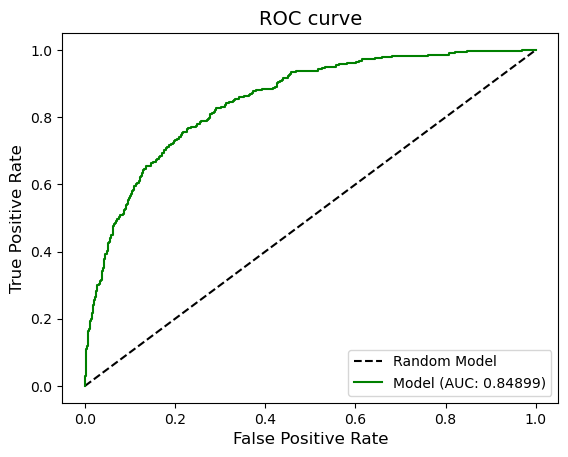

In [15]:
# Take columns with iv > 0.1 and evaluate on the test set. Final AUC is 0.848. Model seems to generally distinguish between negative and positive instances. 
from matplotlib import pyplot as plt
from optbinning.scorecard import plot_auc_roc, plot_ks
X_test = test[colnames]
y_pred = scorecard.predict_proba(X_test)[:, 1]

plot_auc_roc(test["Made_Tournament"], y_pred)

plt.show()

In [16]:
# Compute accuracy, accuracy is around 84%
from sklearn.metrics import classification_report, accuracy_score
final_pre = (y_pred >= 0.5).astype(int)
print("Accuracy:", accuracy_score(test['Made_Tournament'], final_pre))

Accuracy: 0.8449559918754231


In [17]:
# Add section predicting sweet 16 odds